# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Bima Adityo Kurniawan
- **Email:** bimaadityokurniawan@gmail.com
- **ID Dicoding:** naozumi

## Menentukan Pertanyaan Bisnis

- Berapa lama pelanggan harus menunggu untuk menerima pesanan barang yang dibeli?
- Apakah korelasi antara nilai ulasan terhadap waktu pengiriman barang?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengumpulkan data dari berbagai sumber (dalam hal ini, data e-commerce dari Kaggle) yang relevan untuk analisis lebih lanjut. Dataset yang akan diambil hanya ada 2 saja untuk menjawab pertanyaan bisnis.

In [2]:
order_reviews_df = pd.read_csv("dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
orders_df = pd.read_csv("dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- xxx

### Assessing Data

Mengevaluasi kualitas data sebelum dianalisis lebih lanjut. Ini mencakup identifikasi missing values (nilai hilang), duplicate data (data duplikat), data type issues (jenis data yang tidak sesuai), serta outliers (pencilan) atau inconsistent values (nilai yang tidak konsisten). Tujuan dari tahap ini adalah memastikan bahwa data yang digunakan bersih, akurat, dan dapat diandalkan untuk analisis.

**Pengecekan Tipe Data**

In [4]:
order_reviews_df.info()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status    

**Pengecekan Data Duplikat**

In [5]:
print("Jumlah duplikasi reviews_df: ", order_reviews_df.duplicated().sum())
print("Jumlah duplikasi orders_df: ", orders_df.duplicated().sum())

Jumlah duplikasi reviews_df:  0
Jumlah duplikasi orders_df:  0


**Pengecekan Missing Values**

In [6]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat missing value pada comment title dan message

In [7]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing value pada tanggal order_approved, delivered_carrier dan delivered_customer

**Pengecekan Outlier**

In [8]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Tidak ada nilai outlier untuk ulasan

In [9]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Terdapat keanehan pada pembelian 2018 namun estimated delivery date 2017

**Insight:**
- Terdapat missing value pada title dan komentar review pada order_reviews_df
- Terdapat missing value pada orders_df
- Tipe data yang berkaitan dengan waktu masih menggunakan tipe object

### Cleaning Data

**order_reviews**

Karena lazim bagi pelanggan untuk memberikan rating tanpa menulis ulasan di e-commerce, nilai null pada **review_comment_title** akan diisi dengan **"No Title"** dan pada **review_comment_message** akan diisi dengan **"No Comment"**. Pendekatan ini memastikan bahwa semua data tetap tersedia tanpa menghilangkan informasi dari review yang hanya berupa rating. Dengan cara ini, analisis tetap dapat dilakukan secara menyeluruh tanpa mengurangi jumlah data yang signifikan.

In [10]:
order_reviews_df.fillna({ "review_comment_title": "No Title"}, inplace=True)
order_reviews_df.fillna({ "review_comment_message": "No Comment"}, inplace=True)
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**Data Type Waktu**

Semua kolom waktu pada order_reviews_df dan orders_df yang bertipe object:

- review_creation_date
- review_answer_timestamp
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

seharusnya bertipe datetime, bukan object. Jika tetap dalam format object, tidak bisa melakukan operasi perhitungan waktu seperti menghitung lama pengiriman atau perbedaan antara tanggal pesanan dibuat dan disetujui.

In [11]:
order_reviews_df["review_creation_date"] = pd.to_datetime(order_reviews_df["review_creation_date"])
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(order_reviews_df["review_answer_timestamp"])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [12]:
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

# Convert each column to datetime using a loop
for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Dapat terlihat sudah diganti tipe datanya dari object menjadi datetime

**orders**

In [13]:
print(orders_df['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


Analisis difokuskan pada transaksi dengan status 'delivered' (97% dari total dataset) untuk memastikan keakuratan dalam mengevaluasi pengeluaran pelanggan. Nilai tanggal yang hilang pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date terjadi karena saat pengumpulan data, beberapa pesanan masih dalam proses dan belum selesai. Penghapusan data non-delivered dilakukan untuk mendapatkan hasil analisis yang mencerminkan transaksi aktual yang telah selesai tanpa manipulasi data berlebih.

In [14]:
# Simpan jumlah baris sebelum filtering
rows_before = len(orders_df)

# Filter hanya pesanan dengan status delivered (inplace)
orders_df.drop(orders_df[orders_df['order_status'] != 'delivered'].index, inplace=True)

# Informasi tentang jumlah baris yang dihapus
rows_after = len(orders_df)
print(f"Jumlah baris sebelum: {rows_before}")
print(f"Jumlah baris sesudah: {rows_after}")
print(f"Jumlah baris yang dihapus: {rows_before - rows_after}")
print(f"Persentase data yang dipertahankan: {rows_after/rows_before*100:.2f}%")

Jumlah baris sebelum: 99441
Jumlah baris sesudah: 96478
Jumlah baris yang dihapus: 2963
Persentase data yang dipertahankan: 97.02%


In [15]:
print(orders_df['order_status'].value_counts())
orders_df.isna().sum()

order_status
delivered    96478
Name: count, dtype: int64


order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

Meskipun sudah memfilter hanya pesanan dengan status 'delivered', masih terdapat beberapa nilai yang hilang. Ini adalah sebuah kejanggalan karena pesanan yang sudah 'delivered' seharusnya memiliki data lengkap untuk semua tanggal. Imputasi akan dilakukan supaya data masih bisa digunakan untuk analisis selanjutnya.

**order_approved_at (14 missing values):** Imputasi dengan tanggal pembelian plus median waktu persetujuan dari data yang ada

In [16]:
# Hitung median waktu antara pembelian dan persetujuan
approval_delay = (pd.to_datetime(orders_df['order_approved_at']) - pd.to_datetime(orders_df['order_purchase_timestamp'])).median()

# Isi nilai yang hilang
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at']).fillna(pd.to_datetime(orders_df['order_purchase_timestamp']) + approval_delay)

**order_delivered_carrier_date (2 missing values) dan order_delivered_customer_date (8 missing values):** Karena jumlahnya sangat sedikit, dan data-data tersebut seharusnya memiliki nilai untuk pesanan 'delivered', kemungkinan ini adalah kesalahan data. Opsi terbaik adalah imputasi berdasarkan pola waktu pengiriman.

In [17]:
# Untuk carrier date yang hilang
carrier_delay = (pd.to_datetime(orders_df['order_delivered_carrier_date']) - pd.to_datetime(orders_df['order_approved_at'])).median()
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date']).fillna(pd.to_datetime(orders_df['order_approved_at']) + carrier_delay)

# Untuk customer date yang hilang
delivery_delay = (pd.to_datetime(orders_df['order_delivered_customer_date']) - pd.to_datetime(orders_df['order_delivered_carrier_date'])).median()
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date']).fillna(pd.to_datetime(orders_df['order_delivered_carrier_date']) + delivery_delay)

In [18]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Setelah dicek kembali, orders_df sudah bersih dari missing value

**Insight:**
- Mayoritas pesanan (97%) memiliki status "delivered". Status lain seperti "shipped", "canceled", "unavailable" mewakili porsi kecil. Ini menandakan tingkat penyelesaian transaksi yang tinggi dalam dataset ini.

- Bahkan dalam pesanan dengan status "delivered", masih terdapat beberapa nilai yang hilang pada kolom-kolom tanggal. Hal ini mengindikasikan adanya inkonsistensi dalam pencatatan data, di mana status menunjukkan pesanan telah selesai tetapi beberapa timestamp penting tidak tercatat.

- Setelah pembersihan, dataset masih mempertahankan mayoritas data asli. Ini menunjukkan bahwa meskipun ada masalah kualitas data, sebagian besar data masih dapat digunakan untuk analisis

## Exploratory Data Analysis (EDA)

### Explore Data orders_df

Melihat 5 sampel random dari orders_df

In [19]:
orders_df.sample(5) # Show 5 random samples

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
70822,ba4f4ffc1063e52435824b76fc7933a6,eecb43b5c2dc03262b7b5abefd535b3a,delivered,2017-09-14 13:12:39,2017-09-14 13:25:49,2017-09-19 18:29:00,2017-09-27 18:36:31,2017-10-16
49098,154b66f3b29e92e4c9fc7f1ad60cb668,6ab80065dfee8f902e6d0fdabb9bf565,delivered,2017-05-16 13:19:09,2017-05-16 13:30:23,2017-05-18 12:15:20,2017-05-25 09:54:04,2017-06-08
489,d83706c29baf36eedf5e8adfb0da304e,26545a1a15e77138e98380c49a76053a,delivered,2017-03-13 11:36:11,2017-03-13 11:36:11,2017-03-17 15:12:16,2017-03-27 14:12:27,2017-04-12
97164,2cb5ed8e391a8ef966fe938d480510b1,6ea342594088a8d78a51e55e38053887,delivered,2018-03-03 10:12:47,2018-03-06 03:35:42,2018-03-06 19:27:31,2018-04-11 16:59:50,2018-04-06
65783,c89b4a3e71b120553e155292938bcc47,7089bc699da551ead2aca09f75273371,delivered,2018-05-08 13:35:33,2018-05-09 13:35:00,2018-05-09 14:43:00,2018-05-14 23:05:44,2018-05-24


Dataset Brazilian E-Commerce memiliki dua kolom utama yang berkaitan dengan pengiriman:

- **order_purchase_timestamp:** Tanggal pelanggan membeli barang tersebut.
- **order_delivered_customer_date:** Tanggal pesanan benar-benar diterima pelanggan.

Untuk mendapatkan waktu pengiriman dalam hari, dilakukan dengan mencari selisih kedua kolom tersebut

In [20]:
# Hitung waktu pengiriman (delivery_time) dalam hari
orders_df["delivery_time"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days

In [21]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


In [22]:
# Statistik keterlambatan atau kecepatan pengiriman
orders_df["delivery_time"].describe()

count    96478.000000
mean        12.093400
std          9.551027
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

Melihat data tersebut, pengiriman minimal 0 hari dan maksimal sampai 209 hari dengan nilai Q3 15 hari sangat tidak masuk akal sehingga dapat diasumsikan bahwa ada data outlier pada delivery_time. Data outlier disesuaikan menggunakan rumus IQR method, Metode IQR (Interquartile Range) adalah metode yang menetapkan bahwa setiap titik data dalam boxplot yang berada lebih dari 1.5 kali rentang IQR di bawah kuartil pertama atau lebih dari 1.5 kali rentang IQR di atas kuartil ketiga dianggap sebagai outlier.

In [23]:
# Perbaiki delivery time yang bernilai 0 hari (tidak realistis) menjadi 1 hari
orders_df["delivery_time"] = orders_df["delivery_time"].apply(lambda x: max(x, 1))

# Identifikasi outlier dengan metode IQR
Q1 = orders_df["delivery_time"].quantile(0.25)
Q3 = orders_df["delivery_time"].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Hapus outlier
orders_df = orders_df[(orders_df["delivery_time"] >= lower_bound) & (orders_df["delivery_time"] <= upper_bound)]

# Statistik waktu pengiriman setelah menghapus outlier
orders_df["delivery_time"].describe()

IQR: 9.0
Lower bound: -7.5
Upper bound: 28.5


count    91456.000000
mean        10.558531
std          6.059955
min          1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         28.000000
Name: delivery_time, dtype: float64

Sekarang data sudah terlihat lebih normal dengan waktu pengiriman rata-rata 10.5 hari, minimum 1 hari dan maksimum 26 hari (data di atas 28.5 hari tidak dimasukkan karena melebihi upper bound)

### Explore Data order_reviews_df

In [24]:
order_reviews_df.sample(5) # Show 5 random samples

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
83512,3f53132d2d15315ac748f59961b18039,9ed6ff68c038e8845f2f84d08fba359b,5,No Title,No Comment,2018-08-17,2018-08-20 12:02:43
40167,4163fcfee4fe5c3c9c80581d15d890df,69bd4e4ff1a990052d8ae84b843ee045,5,No Title,No Comment,2017-06-13,2017-06-16 02:46:44
46679,f5606c402725a26474a4dd33b37afa55,1534266375dc7e304dd7e81942cb25cd,3,No Title,meu produto veio errado,2018-07-12,2018-07-12 17:44:48
26178,549c0978b9df3db041e3793d81d001da,21c1039048f32ccc62b779bcfd5ac43d,5,No Title,"Entrega rápida, o produto perfeito.",2018-05-08,2018-05-10 13:01:35
7659,0ab203fa324409ddf46525ed11a406ba,1e6582156af0035606a446213730ca65,5,LANERNA DIFERENTE,Uma lanterna bem diferente para uso geral.,2018-06-06,2018-06-06 19:22:07


In [25]:
order_reviews_df["review_score"].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

Bintang 5 adalah nilai ulasan terbanyak yang diberikan oleh pelanggan

### Explore All Data

In [26]:
# Menggabungkan data orders dan reviews berdasarkan order_id
cleaned_df = pd.merge(order_reviews_df, orders_df, on='order_id', how='inner')
cleaned_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
40701,839334184a22c4705f8a1ae43ea0eab6,2e82339ec0f39a69be776815f3bac508,4,No Title,"o produto veio correto, a barra magnética aten...",2018-02-02,2018-02-05 12:11:53,66d5a520e4f7af2cdc4f725d8d8ed705,delivered,2018-01-29 22:49:11,2018-01-29 23:11:20,2018-01-30 19:37:08,2018-02-01 17:54:54,2018-02-16,2
66289,469d5afe7af797c63fa2ad0730d080fa,2c453858db792dfba1340601d2814b28,4,No Title,ccccccccc cccccccc ccccc ccc,2018-03-29,2018-03-31 17:59:54,fc583cfdde5d391a98d0f17d30209677,delivered,2018-03-16 11:13:44,2018-03-16 11:29:28,2018-03-22 19:48:38,2018-03-28 20:04:12,2018-04-12,12
34357,f8844abb0daf6953644fb977e399ad0a,b001a9f70c34cbf4eca4e48875de711c,5,No Title,No Comment,2018-06-26,2018-06-28 19:35:07,787d7b6a8571b25652a185aae5ebc9b7,delivered,2018-06-19 17:05:20,2018-06-19 17:45:06,2018-06-20 13:25:00,2018-06-25 20:51:50,2018-07-20,6
52439,c5d326330fa0e0bab4652aeeeff6f809,8a80054573ee01a321c77752da93566b,5,No Title,No Comment,2017-12-05,2017-12-06 09:31:04,8f7a8c9d811d4acc07eaaf3cae69ac34,delivered,2017-11-24 07:46:21,2017-11-24 07:56:31,2017-11-28 15:48:30,2017-12-04 22:56:39,2017-12-15,10
19985,fe5a30167589783662527e9203624c00,2cd938176e6aaa529800d96e692e9c6b,5,Ótimo produto,"Produto muito bonito, chegou antes do prazo re...",2018-08-09,2018-08-16 20:30:13,67a3c95ffc4184739559faccab4612e0,delivered,2018-08-05 20:20:16,2018-08-05 20:35:16,2018-08-06 11:51:00,2018-08-08 13:29:04,2018-08-10,2


In [27]:
# Save the all_data to a CSV file
cleaned_df.to_csv("dashboard/main_data.csv", index=False)

**Insight:**
- Secara umum, pelanggan menerima barangnya dalam waktu sekitar 10 hingga 11 hari setelah pesanan dibuat.
- Meski sudah membuang outlier, persebaran waktu pengiriman (6 hari di atas/bawah rata-rata) masih cukup luas. Ini mengindikasikan adanya nilai variasi yang signifikan dalam proses pengiriman. Ada pelanggan yang menerima barang dalam 1–2 hari, tapi ada juga yang menunggu hingga 2–3 minggu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa lama pelanggan harus menunggu untuk menerima pesanan barang yang dibeli?

Pertanyaan ini akan dijawab dengan visualisasi Histogram dan grafik CDF (Cumulative Distribution Function)

Histogram dapat menampilkan frekuensi setiap rentang (bin) waktu pengiriman, sehingga dapat melihat pola apakah data cenderung terkumpul di rentang tertentu (misalnya 5–10 hari) atau tersebar. Penambahan KDE (Kernel Density Estimate) membantu melihat kurva halus yang mewakili kepadatan data, memberikan gambaran lebih jelas tentang puncak (peak) distribusi. Ini dapat menjawab seberapa umum waktu pengiriman tertentu dan apakah distribusinya condong (skewed) ke kanan/kiri.

CDF dapat menunjukkan persentase kumulatif pesanan yang telah terkirim hingga hari tertentu. Dengan menambahkan garis bantu pada 50%, 80%, dan 95%. CDF memudahkan membaca persentase pesanan yang tiba dalam rentang waktu tertentu, sehingga akan diketahui “50% pesanan tiba dalam X hari,” “80% dalam Y hari,” dll.

Statistik Waktu Pengiriman (dalam hari):
count    91438.000000
mean        10.557449
std          6.056640
min          1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         28.000000
Name: delivery_time, dtype: float64


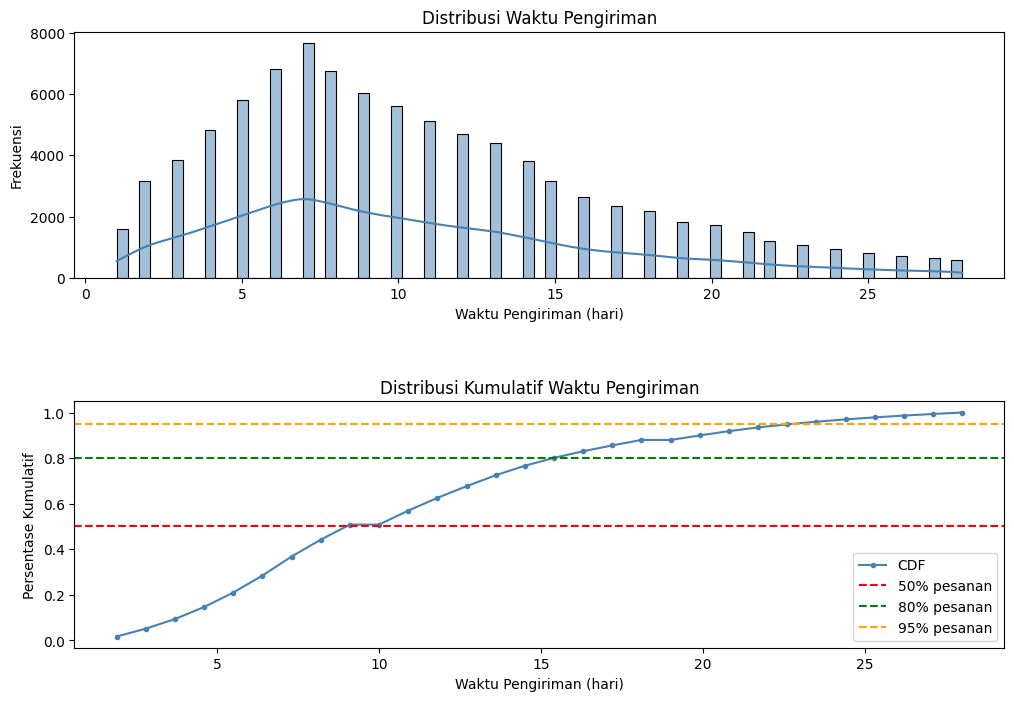

In [28]:
# 1. Analisis statistik deskriptif waktu pengiriman
delivery_stats = cleaned_df["delivery_time"].describe()
print("Statistik Waktu Pengiriman (dalam hari):")
print(delivery_stats)

# 2. Visualisasi distribusi waktu pengiriman
plt.figure(figsize=(12, 8))

# Histogram dan KDE untuk distribusi waktu pengiriman
plt.subplot(2, 1, 1)
sns.histplot(cleaned_df["delivery_time"], kde=True, color="steelblue")
plt.title("Distribusi Waktu Pengiriman")
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Frekuensi")

# Cumulative distribution function (CDF) - persentase pesanan berdasarkan waktu tunggu
plt.subplot(2, 1, 2)
count, bins_count = np.histogram(cleaned_df["delivery_time"], bins=30)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF", marker=".", color="steelblue")
plt.axhline(y=0.5, color="red", linestyle="--", label="50% pesanan")
plt.axhline(y=0.8, color="green", linestyle="--", label="80% pesanan")
plt.axhline(y=0.95, color="orange", linestyle="--", label="95% pesanan")
plt.title("Distribusi Kumulatif Waktu Pengiriman")
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Persentase Kumulatif")
plt.legend()

# Increase vertical space between subplots
plt.subplots_adjust(hspace=0.5)

plt.savefig("delivery_time_analysis.png", dpi=300)
plt.show()

1. Analisis Histogram Distribusi Waktu Pengiriman

    Histogram menunjukkan bahwa waktu **pengiriman paling umum terjadi dalam rentang 5 hingga 10 hari, dengan puncak frekuensi sekitar 8 hari**.
    Distribusi memiliki ekor panjang ke kanan, menunjukkan bahwa ada beberapa pesanan yang membutuhkan waktu lebih lama untuk dikirim, hingga lebih dari 25 hari. **Sebagian besar pesanan dikirim dalam kurang dari 15 hari**, tetapi ada variabilitas yang cukup besar dalam waktu pengiriman.
    Pola ini mengindikasikan bahwa meskipun mayoritas pengiriman terjadi dalam waktu yang wajar, ada sejumlah pesanan yang mengalami keterlambatan signifikan.

2. Analisis Distribusi Kumulatif Waktu Pengiriman (CDF)

    Grafik CDF menunjukkan persentase kumulatif pesanan yang telah terkirim dalam rentang waktu tertentu.
    Garis merah menunjukkan bahwa sekitar **50% pesanan terkirim dalam waktu sekitar 9 hari.**
    Garis hijau menunjukkan bahwa sekitar **80% pesanan terkirim dalam 15-20 hari.**
    Garis oranye menunjukkan bahwa sekitar **95% pesanan terkirim dalam waktu sekitar 20-25 hari.**
    Kurva CDF memiliki pertumbuhan yang lebih cepat di bagian awal (0-10 hari), yang menandakan bahwa sebagian besar pesanan dikirim dalam waktu yang relatif singkat. Namun, pertumbuhannya melambat setelah 15 hari, menunjukkan bahwa sebagian kecil pesanan mengalami waktu pengiriman yang jauh lebih lama dari rata-rata.

### Pertanyaan 2: Apakah korelasi antara nilai ulasan terhadap waktu pengiriman barang?

Analisis ini dimulai dengan menghitung nilai korelasi antara skor ulasan dan waktu pengiriman menggunakan fungsi corr() pada dataframe yang telah digabungkan, yang bertujuan untuk memberikan ukuran statistik mengenai seberapa kuat hubungan linier antara kedua variabel tersebut. Pendekatan ini memungkinkan untuk mengetahui apakah terdapat kecenderungan bahwa pengiriman yang lebih cepat berhubungan dengan ulasan yang lebih tinggi atau sebaliknya, sehingga menyediakan dasar kuantitatif untuk analisis lebih lanjut.

Visualisasi pertama yang digunakan adalah boxplot, yang menampilkan distribusi waktu pengiriman untuk setiap nilai ulasan. Dengan boxplot, dapat dengan mudah mengidentifikasi rentang, median, dan potensi outlier dari waktu pengiriman pada masing-masing kategori ulasan. Hal ini membantu untuk melihat variasi dan kecenderungan distribusi waktu pengiriman di berbagai tingkat kepuasan pelanggan, sehingga memberikan gambaran visual yang mendalam mengenai hubungan antara dua variabel tersebut.

Selanjutnya, kode ini juga menyertakan grouped barplot dan heatmap untuk memperkaya analisis. Grouped barplot menampilkan rata-rata waktu pengiriman untuk setiap skor ulasan, yang memudahkan interpretasi perbandingan antara kategori ulasan secara kuantitatif. Sementara itu, heatmap dibuat dengan mengelompokkan waktu pengiriman ke dalam kategori rentang tertentu, sehingga dapat memperlihatkan jumlah ulasan pada masing-masing kategori waktu pengiriman untuk setiap skor. Kombinasi visualisasi ini memberikan pemahaman yang lebih komprehensif mengenai pola dan distribusi waktu pengiriman terkait dengan kepuasan pelanggan.

Korelasi antara nilai ulasan dan waktu pengiriman: -0.1720


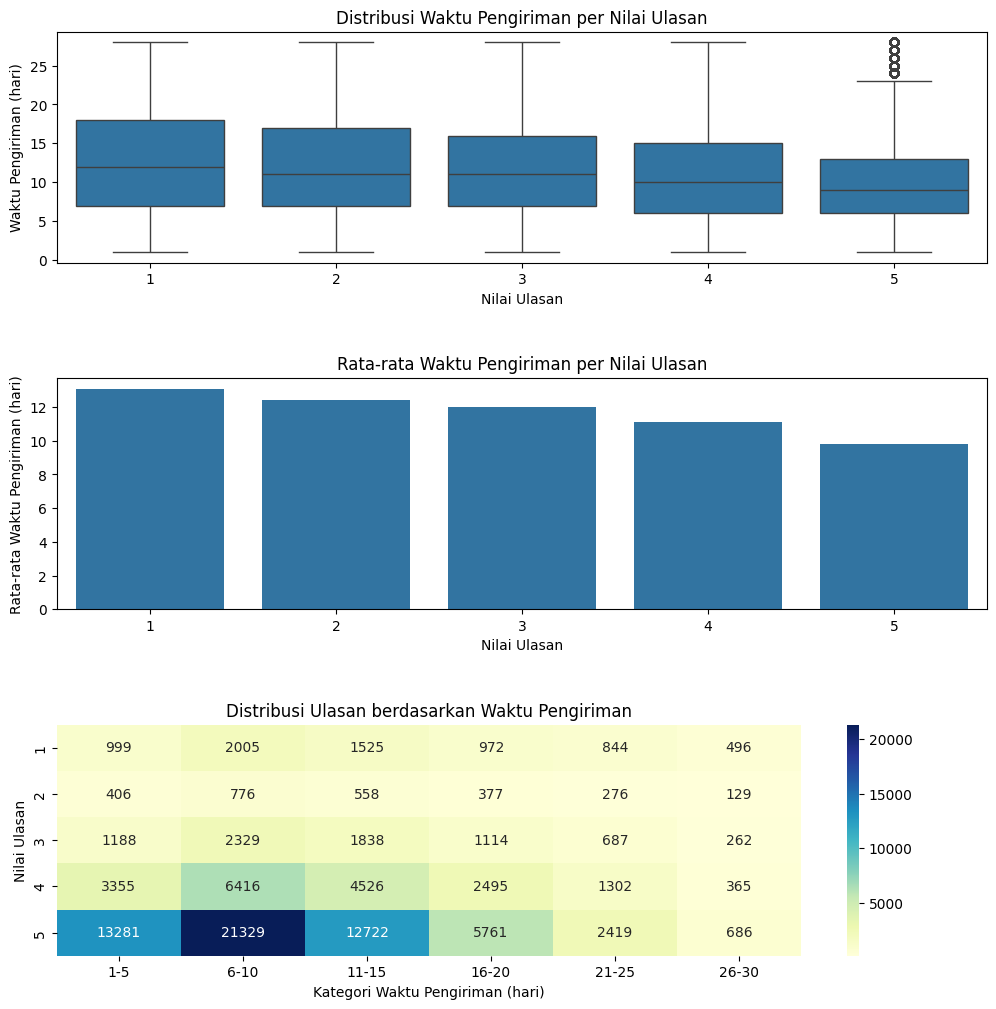

In [29]:
# Menghitung korelasi antara review_score dan delivery_time
correlation = cleaned_df['review_score'].corr(cleaned_df['delivery_time'])
print(f"Korelasi antara nilai ulasan dan waktu pengiriman: {correlation:.4f}")

plt.figure(figsize=(12, 12))  # Ubah tinggi figure agar cukup untuk 4 grafik ke bawah

# A. Boxplot: Distribusi waktu pengiriman untuk setiap nilai ulasan
plt.subplot(3, 1, 1)  
sns.boxplot(x='review_score', y='delivery_time', data=cleaned_df)
plt.title('Distribusi Waktu Pengiriman per Nilai Ulasan')
plt.xlabel('Nilai Ulasan')
plt.ylabel('Waktu Pengiriman (hari)')

# B. Grouped barplot: Rata-rata waktu pengiriman per nilai ulasan
plt.subplot(3, 1, 2)  
avg_delivery_by_score = cleaned_df.groupby('review_score')['delivery_time'].mean().reset_index()
sns.barplot(x='review_score', y='delivery_time', data=avg_delivery_by_score)
plt.title('Rata-rata Waktu Pengiriman per Nilai Ulasan')
plt.xlabel('Nilai Ulasan')
plt.ylabel('Rata-rata Waktu Pengiriman (hari)')

# C. Heatmap: Jumlah ulasan berdasarkan score dan range waktu pengiriman
plt.subplot(3, 1, 3)  
cleaned_df['delivery_time_category'] = pd.cut(cleaned_df['delivery_time'], 
                                             bins=[0, 5, 10, 15, 20, 25, 30], 
                                             labels=['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'])
heatmap_data = pd.crosstab(cleaned_df['review_score'], cleaned_df['delivery_time_category'])
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Distribusi Ulasan berdasarkan Waktu Pengiriman')
plt.xlabel('Kategori Waktu Pengiriman (hari)')
plt.ylabel('Nilai Ulasan')

plt.subplots_adjust(hspace=0.5)

plt.savefig('review_vs_delivery_time_vertical.png')
plt.show()

Dari visualisasi ini, dapat diambil kesimpulan terkait hubungan antara waktu pengiriman dan nilai ulasan pelanggan:

1. Hubungan Negatif antara Waktu Pengiriman dan Nilai Ulasan (boxplot dan bar chart)

    **Terlihat bahwa semakin tinggi nilai ulasan (skor 5), semakin rendah rata-rata waktu pengiriman. Sebaliknya, ulasan dengan skor 1 cenderung memiliki waktu pengiriman yang lebih lama.** Hal ini menunjukkan bahwa pelanggan lebih cenderung memberikan ulasan negatif jika pengiriman mereka memakan waktu lebih lama.

2. Distribusi Ulasan Berdasarkan Kategori Waktu Pengiriman (heatmap)

    **Mayoritas ulasan dengan skor 5 terjadi pada kategori waktu pengiriman 1-5 hari dan 6-10 hari, yang memiliki angka tertinggi (13.281 dan 21.329 ulasan)**. Semakin lama waktu pengiriman, semakin sedikit jumlah ulasan yang diberikan dengan skor tinggi. Skor 1 lebih banyak muncul pada waktu pengiriman yang lebih lama, menunjukkan bahwa pengiriman yang terlambat meningkatkan kemungkinan ulasan negatif.

**Insight:**
- Waktu pengiriman yang paling umum adalah antara 5 hingga 10 hari, dengan median sekitar 9 hari. 80% pesanan tiba dalam 15 hari, yang dapat dijadikan sebagai acuan untuk mengukur performa pengiriman. Sekitar 5% pesanan mengalami keterlambatan lebih dari 23 hari, yang menunjukkan adanya kasus outlier atau masalah logistik yang perlu diperhatikan.
- Pengiriman yang lebih cepat berkontribusi pada kepuasan pelanggan yang lebih tinggi, sementara keterlambatan cenderung meningkatkan ulasan negatif. Mempercepat waktu pengiriman dapat menjadi strategi efektif untuk meningkatkan rating dan loyalitas pelanggan.

## Analisis Lanjutan (Opsional)

Penggunaan teknik clustering dalam analisis waktu pengiriman dengan memanfaatkan bins=[0, 5, 10, 15, 20, 25, 30] merupakan pendekatan yang efektif untuk mengkonversi data kontinu menjadi kategori diskrit yang terdefinisi dengan jelas. Dengan membagi waktu pengiriman ke dalam interval tertentu, data yang awalnya kompleks dan tersebar dapat diorganisir dalam kelompok-kelompok homogen, sehingga memudahkan evaluasi dan perbandingan antar kelompok. Pendekatan ini memungkinkan untuk menyederhanakan analisis statistik dan meminimalisasi noise yang muncul dari variabilitas data mentah.

Selain itu, teknik clustering ini mendukung visualisasi data yang lebih informatif dan mudah diinterpretasikan. Representasi grafis seperti heatmap, boxplot, dan bar chart yang mengelompokkan data berdasarkan interval waktu pengiriman menyediakan gambaran yang komprehensif mengenai distribusi dan kecenderungan pengiriman. Visualisasi tersebut membantu dalam mengidentifikasi pola-pola penting, misalnya hubungan antara durasi pengiriman dan tingkat kepuasan pelanggan, sehingga dapat mengungkap insight yang berharga untuk pengambilan keputusan.

Secara keseluruhan, penerapan metode clustering berbasis interval waktu pengiriman menghasilkan struktur data yang lebih terorganisir dan memberikan pemahaman mendalam terhadap distribusi pengiriman dalam konteks operasional. Hasil analisis ini berkontribusi pada pengembangan strategi logistik yang lebih tepat sasaran, dengan menetapkan target waktu pengiriman yang realistis dan mengoptimalkan proses guna meningkatkan kualitas layanan serta kepuasan pelanggan.

## Conclusion

- **Berapa lama pelanggan harus menunggu untuk menerima pesanan barang yang dibeli?** Pelanggan e-commerce Brazil umumnya harus menunggu sekitar 9 hari untuk menerima pesanan mereka, dengan 50% pesanan tiba dalam waktu tersebut. Sekitar 80% pesanan dikirim dalam 15-20 hari, sementara 95% pesanan tiba dalam waktu kurang dari 25 hari. Meskipun sebagian besar pesanan dikirim dalam waktu yang wajar, ada beberapa kasus keterlambatan yang signifikan, yang dapat memengaruhi pengalaman pelanggan.

- **Apakah korelasi antara nilai ulasan terhadap waktu pengiriman barang?** Terdapat korelasi negatif antara nilai ulasan dan waktu pengiriman barang di e-commerce Brazil. Semakin lama waktu pengiriman, semakin rendah rata-rata skor ulasan yang diberikan pelanggan. Sebagian besar ulasan dengan skor tinggi (5) berasal dari pesanan yang dikirim dalam 1-10 hari, sedangkan ulasan dengan skor rendah (1) lebih sering muncul pada pengiriman yang lebih lama. Hal ini menunjukkan bahwa keterlambatan pengiriman berdampak signifikan terhadap kepuasan pelanggan dan cenderung meningkatkan kemungkinan ulasan negatif.